# Global Analysis: Statistics

In [11]:
import os, csv, glob, collections
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
csv.register_dialect("textdialect", delimiter='\t')
mpl.rcParams['font.family'] = 'Arial'
%matplotlib inline

##1. Let's get some global stats for this dataset

In [13]:
# Count number of books and images for each date

direc = "G:\MechanicalCuratorReleaseData\imagedirectory\imagedirectory-master"
date_to_titles = collections.defaultdict(lambda: set())
date_to_count = collections.defaultdict(lambda: 0)
date_to_small = collections.defaultdict(lambda: 0)
date_to_medium = collections.defaultdict(lambda: 0)
date_to_plates = collections.defaultdict(lambda: 0)
title_to_imagecount = collections.defaultdict(lambda: 0)
for fn in glob.glob(direc + "\*.tsv"):
    if 'unknown' in fn: continue
    with open(fn, 'r') as ifile:
        reader = csv.reader(ifile ,'textdialect')
        reader.next()
        for row in reader:
            date = row[8]
            title = row[2]
            date_to_count[date] += 1
            date_to_titles[date].add(title)
            title_to_imagecount[title] += 1
            if 'small' in fn: date_to_small[date] += 1
            elif 'medium' in fn: date_to_medium[date] += 1
            else: date_to_plates[date] += 1

In [14]:
# Aggregate
date_to_numbooks = {}
for date in date_to_titles:
    date_to_numbooks[date] = len(date_to_titles[date])
    
date_to_imagect = {}
for date in date_to_titles:
    total = 0
    counter = 0
    for title in date_to_titles[date]:
        total += title_to_imagecount[title]
        counter += 1
    date_to_imagect[date] = float(total)/counter

In [19]:
# Raw numbers
print "Total number of images: {}".format(sum([date_to_count[x] for x in date_to_count]))
print "Total number of small images: {}".format(sum([date_to_small[x] for x in date_to_small]))
print "Total number of medium images: {}".format(sum([date_to_medium[x] for x in date_to_medium]))
print "Total number of plate images: {}".format(sum([date_to_plates[x] for x in date_to_plates]))
print "Total number of books: {}".format(sum([date_to_numbooks[x] for x in date_to_numbooks]))

Total number of images: 1014190
Total number of small images: 414727
Total number of medium images: 216360
Total number of plate images: 383103
Total number of books: 30994


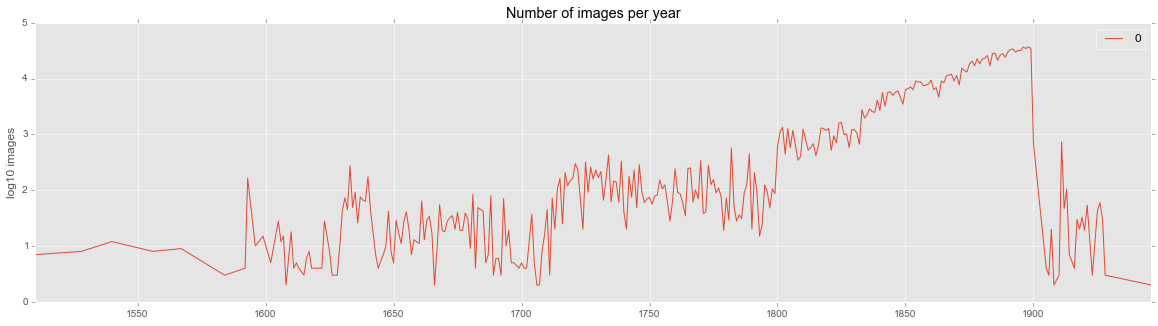

In [16]:
date_to_count_df = pd.DataFrame.from_dict(date_to_count, orient='index')
date_to_count_df.index = [int(x) for x in date_to_count_df.index]
date_to_count_df = date_to_count_df.sort_index(ascending=True)
np.log10(date_to_count_df + 1).plot(use_index=True, figsize=[20,5])
plt.title("Number of images per year")
plt.ylabel("log10 images")
plt.show()

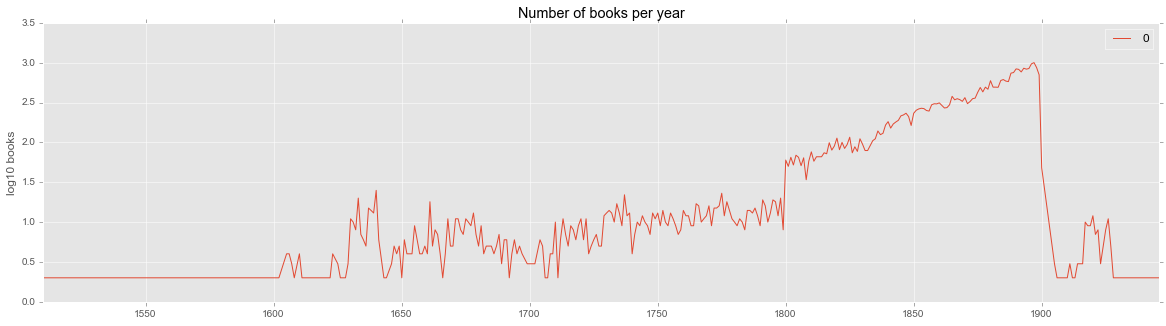

In [17]:
date_to_numbooks_df = pd.DataFrame.from_dict(date_to_numbooks, orient='index')
date_to_numbooks_df.index = [int(x) for x in date_to_numbooks_df.index]
date_to_numbooks_df = date_to_numbooks_df.sort_index(ascending=True)
np.log10(date_to_numbooks_df + 1).plot(use_index=True, figsize=[20,5])
plt.title("Number of books per year")
plt.ylabel("log10 books")
plt.show()

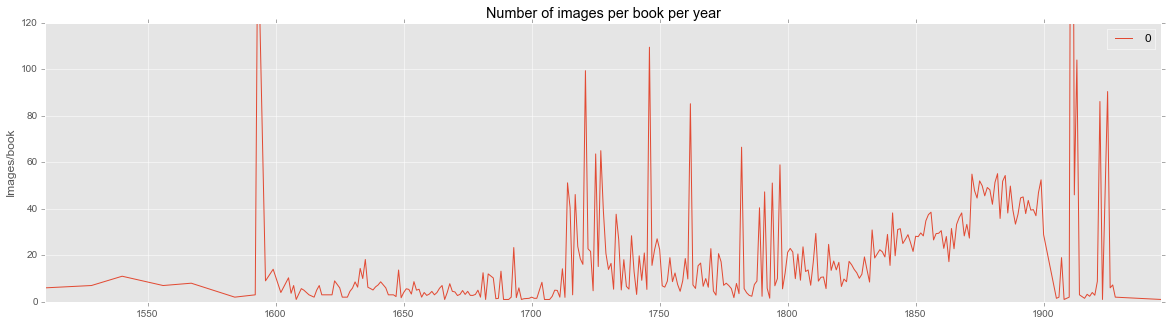

In [18]:
date_to_imagect_df = pd.DataFrame.from_dict(date_to_imagect, orient='index')
date_to_imagect_df.index = [int(x) for x in date_to_imagect_df.index]
date_to_imagect_df = date_to_imagect_df.sort_index(ascending=True)
date_to_imagect_df.plot(use_index=True, figsize=[20,5])
plt.ylim([0, 120])
plt.title("Number of images per book per year")
plt.ylabel("Images/book")
plt.show()

##2. Statistics from manual tagging

In [3]:
# Read in image-to-tag dataset

#ifn = "20160217_image_to_manual_tags.csv"
ifn = "20160228_image_to_manual_tags.csv"

data = []
books = set()
ctr = 0
with open(ifn, 'r') as ifile:
    for line in ifile:
        ctr += 1
        row = line.split('| ')
        if len(row) < 2: continue
        name = row[0].split('|')[1]
        book = name.split('_')[0]
        books.add(int(book))
        year = int(name.split('.jpg')[0][-4:])
        tag = row[1].rstrip()
        data.append({"name": name, "year": year, "tag": tag})

print "Number of images: {}".format(ctr)
print "Number of books: {}".format(len(books))
data_df = pd.DataFrame.from_dict(data)
data_df.head(10)

Number of images: 1408
Number of books: 926


,name,tag,year
0,003194022_0_000108_2_The Two Famous Pitcht Bat...,Miniatures,1634
1,002898188_0_000017_2_Great Britains Glory or ...,Miniatures,1672
2,000366999_0_000110_1_Creation A philosophical...,Decorations,1712
3,001440932_0_000005_1_[Medea etc ]_1762.jpg,Text,1762
4,001230725_0_000387_1_Fielding komischer Roman ...,Decorations,1765
5,001749858_0_000098_1_A selection of Views in t...,Architecture,1801
6,002212096_0_000050_1_Geschichte von dem Urspru...,Text,1801
7,002326709_0_000002_1_An excursion in France a...,Seals,1804
8,000091083_02_000306_1_Voyages and Travels to I...,Maps,1809
9,003641179_0_000051_1_Observations on the breed...,Animals,1811


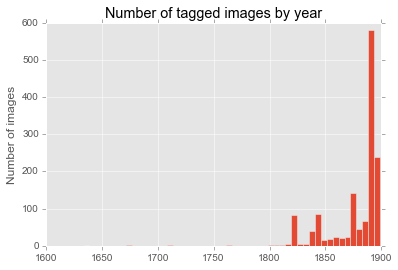

In [10]:
# histogram by year

data_df["year"].hist(bins=50)
plt.title("Number of tagged images by year")
plt.ylabel("Number of images")

              name
tag               
Animals        105
Architecture   129
Decorations    101
Diagrams       102
Landscape      104
Maps           103
Miniatures      99
Nature         102
Objects        107
People         238
Seals          103
Text           113


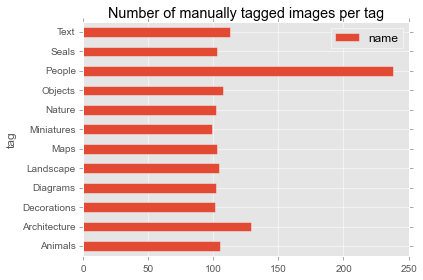

In [5]:
# number of images per tag

cts = data_df[["name", "tag"]].groupby("tag").count()
print cts
plt.figure()
cts.plot(kind='barh')
plt.title("Number of manually tagged images per tag")
plt.tight_layout()
plt.show()

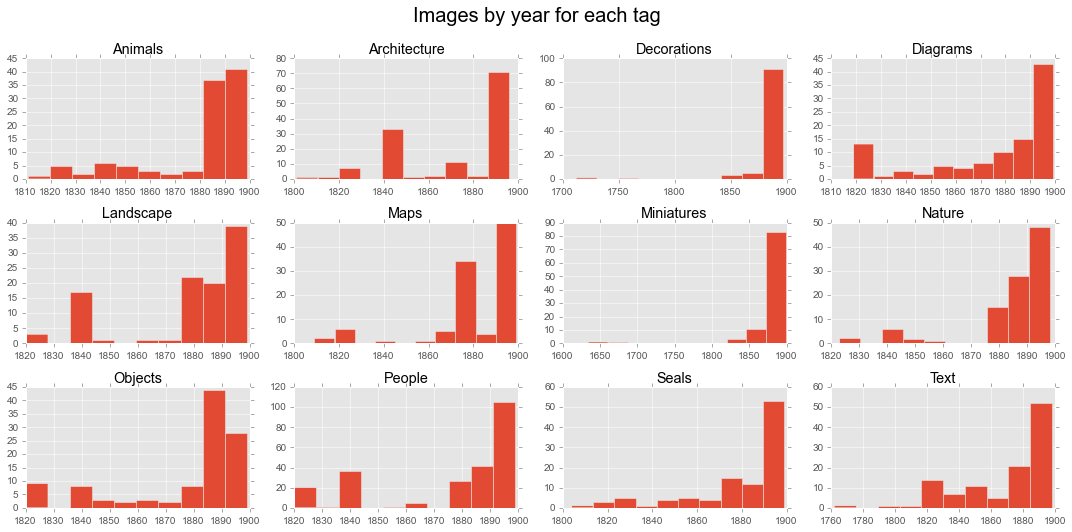

In [6]:
# histogram of images per tag

plt.figure(figsize=[15, 7])
plt.suptitle('Images by year for each tag', fontsize=20, y = 1.05)
ctr = 0
tags = cts.index
for i in tags:
    ctr += 1
    plt.subplot(3,4,ctr)
    data_df[data_df["tag"] == i]["year"].hist()
    plt.title(i)
plt.tight_layout()
plt.show()